In [1]:
import pandas as pd
df = pd.read_csv('../data/ETCUSDT_15m.csv')
df.head()

,time,open,high,low,close,volume
0,2023-08-15 00:00:00,17.499,17.509,17.489,17.500,29156.96
1,2023-08-15 00:15:00,17.500,17.511,17.500,17.503,12196.34
2,2023-08-15 00:30:00,17.502,17.506,17.476,17.492,25092.81
3,2023-08-15 00:45:00,17.491,17.504,17.488,17.504,26656.61
4,2023-08-15 01:00:00,17.503,17.511,17.492,17.509,14671.93


In [2]:
import pandas_ta as ta
df["EMA"] = ta.ema(df.close, length=50)
df["RSI"] = ta.rsi(df.close, length=3)
a=ta.adx(df.high, df.low, df.close, length=5)
df['ADX']=a['ADX_5']
df['ATR']= df.ta.atr()
#help(ta.adx)

In [3]:
#dropna
df = df.dropna()
df.head()

,time,open,high,low,close,volume,EMA,RSI,ADX,ATR
49,2023-08-15 12:15:00,17.296,17.329,17.295,17.315,28694.62,17.393360,66.563860,39.318618,0.027211
50,2023-08-15 12:30:00,17.315,17.320,17.287,17.313,21661.13,17.390209,63.062495,32.722450,0.027635
51,2023-08-15 12:45:00,17.313,17.323,17.311,17.313,15565.51,17.387181,63.062495,28.478177,0.026492
52,2023-08-15 13:00:00,17.314,17.324,17.309,17.321,12609.22,17.384586,74.930673,24.103408,0.025653
53,2023-08-15 13:15:00,17.320,17.340,17.314,17.332,23245.98,17.382523,84.922429,26.303759,0.025678


In [4]:
#set time to index

df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
df.head()

/tmp/ipykernel_39466/1852176384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])


,open,high,low,close,volume,EMA,RSI,ADX,ATR
time,,,,,,,,,
2023-08-15 12:15:00,17.296,17.329,17.295,17.315,28694.62,17.393360,66.563860,39.318618,0.027211
2023-08-15 12:30:00,17.315,17.320,17.287,17.313,21661.13,17.390209,63.062495,32.722450,0.027635
2023-08-15 12:45:00,17.313,17.323,17.311,17.313,15565.51,17.387181,63.062495,28.478177,0.026492
2023-08-15 13:00:00,17.314,17.324,17.309,17.321,12609.22,17.384586,74.930673,24.103408,0.025653
2023-08-15 13:15:00,17.320,17.340,17.314,17.332,23245.98,17.382523,84.922429,26.303759,0.025678


In [5]:
from directional_change import *
from xabcd import *
from collections import Counter

ext = get_extremes(df, sigma=0.02)
patterns = find_xabcd(df,extremes=ext, err_thresh=0.5)
# patterns.keys()
# temp = patterns['Gartley']['bear_signal']
# Counter(temp)
for idx in patterns.keys():
    bull_signal = patterns[idx]['bull_signal']
    original_bull_signal_count = Counter(bull_signal)
    bear_signal = patterns[idx]['bear_signal']
    original_bear_signal_count = Counter(bear_signal)
    print(f"Pattern: {idx} , bull_signal: {original_bull_signal_count}, bear_signal: {original_bear_signal_count}")
    # put all signals together
    all_signals = bull_signal + bear_signal
    # count the number of each signal
    count = Counter(all_signals)
    print(idx, count)
    df[idx] = all_signals
    print("=====================================")

Pattern: Gartley , bull_signal: Counter({0.0: 6488, 1.0: 463}), bear_signal: Counter({0.0: 6928, -1.0: 23})
Gartley Counter({0.0: 6465, 1.0: 463, -1.0: 23})
Pattern: Bat , bull_signal: Counter({0.0: 6951}), bear_signal: Counter({0.0: 6951})
Bat Counter({0.0: 6951})
Pattern: Butterfly , bull_signal: Counter({0.0: 6951}), bear_signal: Counter({0.0: 6821, -1.0: 130})
Butterfly Counter({0.0: 6821, -1.0: 130})
Pattern: Crab , bull_signal: Counter({0.0: 6951}), bear_signal: Counter({0.0: 6951})
Crab Counter({0.0: 6951})
Pattern: Deep Crab , bull_signal: Counter({0.0: 6949, 1.0: 2}), bear_signal: Counter({0.0: 6901, -1.0: 50})
Deep Crab Counter({0.0: 6899, -1.0: 50, 1.0: 2})
Pattern: Cypher , bull_signal: Counter({0.0: 6940, 1.0: 11}), bear_signal: Counter({0.0: 6914, -1.0: 37})
Cypher Counter({0.0: 6903, -1.0: 37, 1.0: 11})
Pattern: Shark , bull_signal: Counter({0.0: 6951}), bear_signal: Counter({0.0: 6822, -1.0: 129})
Shark Counter({0.0: 6822, -1.0: 129})


In [6]:
#rename columns
df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

In [7]:
df['Gartley'].value_counts()

 0.0    6465
 1.0     463
-1.0      23
Name: Gartley, dtype: int64

In [8]:
from backtesting import Strategy
from backtesting import Backtest

def SIGNAL(df,col_name):
    return df[col_name]

class XABCD_Strategy(Strategy):
    pattern_type = 'Gartley' # [GARTLEY, BAT, BUTTERFLY, CRAB, DEEP_CRAB, CYPHER, SHARK]
    atr_sl_rate = 1.3
    TPSL_rate = 1.5
    trade_limit = 0
    adx_thresh = 25

    def init(self):
        super().init()
        self.signal = self.I(SIGNAL, self.data, self.pattern_type)

    def next(self):
        super().next()

        slatr = self.atr_sl_rate * self.data.ATR[-1]
        if self.signal == 1.0 and len(self.trades)<=self.trade_limit and self.data.ADX[-1] > self.adx_thresh:
            sl_price = self.data.Close[-1] - slatr
            tp_price = self.data.Close[-1] + self.TPSL_rate * slatr
            self.buy(sl=sl_price, tp=tp_price)
        if self.signal == -1.0 and len(self.trades)<=self.trade_limit and self.data.ADX[-1] > self.adx_thresh:
            sl_price = self.data.Close[-1] + slatr
            tp_price = self.data.Close[-1] - self.TPSL_rate * slatr
            self.sell(sl=sl_price, tp=tp_price)

bt = Backtest(df, XABCD_Strategy, cash=100, commission=.00002, margin=.05)
stat = bt.run()
stat

Start                     2023-08-15 12:15:00
End                       2023-10-26 21:45:00
Duration                     72 days 09:30:00
Exposure Time [%]                    7.250755
Equity Final [$]                   197.594451
Equity Peak [$]                    222.140646
Return [%]                          97.594451
Buy & Hold Return [%]               -4.360381
Return (Ann.) [%]                 2912.130056
Volatility (Ann.) [%]             6770.209532
Sharpe Ratio                         0.430139
Sortino Ratio                       59.381712
Calmar Ratio                        64.544593
Max. Drawdown [%]                   -45.11811
Avg. Drawdown [%]                  -16.920794
Max. Drawdown Duration       35 days 19:45:00
Avg. Drawdown Duration        7 days 11:48:00
# Trades                                   63
Win Rate [%]                        42.857143
Best Trade [%]                       2.293493
Worst Trade [%]                     -0.563004
Avg. Trade [%]                    

In [9]:
%%time
stats = bt.optimize(atr_sl_rate = np.arange(0.5, 2.6, 0.2).tolist(),
                    TPSL_rate = np.arange(0.5, 2.6, 0.2).tolist(),
                    adx_thresh = np.arange(10, 40, 5).tolist(),
                    pattern_type = ['Gartley','Bat','Butterfly','Crab','Cypher','Shark'],
                    maximize='Equity Final [$]')
stats

/home/hibana2077/.local/lib/python3.10/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 4356 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/15 [00:00<?, ?it/s]

/home/hibana2077/.local/lib/python3.10/site-packages/backtesting/_stats.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501
/home/hibana2077/.local/lib/python3.10/site-packages/backtesting/_stats.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501
/home/hibana2077/.local/lib/python3.10/site-packages/backtesting/_stats.py:122: RuntimeWarning: divide by zero encountered in double_scalars
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501
/home/hibana2077/.local/lib/

CPU times: user 455 ms, sys: 129 ms, total: 585 ms
Wall time: 2min 18s


Start                     2023-08-15 12:15:00
End                       2023-10-26 21:45:00
Duration                     72 days 09:30:00
Exposure Time [%]                   10.329449
Equity Final [$]                   444.577204
Equity Peak [$]                    444.577204
Return [%]                         344.577204
Buy & Hold Return [%]               -4.360381
Return (Ann.) [%]               173574.458152
Volatility (Ann.) [%]          1633550.983375
Sharpe Ratio                         0.106256
Sortino Ratio                     2203.652183
Calmar Ratio                      3930.524233
Max. Drawdown [%]                  -44.160638
Avg. Drawdown [%]                  -10.285723
Max. Drawdown Duration       34 days 00:15:00
Avg. Drawdown Duration        1 days 15:21:00
# Trades                                   17
Win Rate [%]                        47.058824
Best Trade [%]                       4.059257
Worst Trade [%]                     -0.735226
Avg. Trade [%]                    

In [10]:
stats.keys()

Index(['Start', 'End', 'Duration', 'Exposure Time [%]', 'Equity Final [$]',
       'Equity Peak [$]', 'Return [%]', 'Buy & Hold Return [%]',
       'Return (Ann.) [%]', 'Volatility (Ann.) [%]', 'Sharpe Ratio',
       'Sortino Ratio', 'Calmar Ratio', 'Max. Drawdown [%]',
       'Avg. Drawdown [%]', 'Max. Drawdown Duration', 'Avg. Drawdown Duration',
       '# Trades', 'Win Rate [%]', 'Best Trade [%]', 'Worst Trade [%]',
       'Avg. Trade [%]', 'Max. Trade Duration', 'Avg. Trade Duration',
       'Profit Factor', 'Expectancy [%]', 'SQN', '_strategy', '_equity_curve',
       '_trades'],
      dtype='object')

In [11]:
stats._strategy

<Strategy XABCD_Strategy(atr_sl_rate=1.4999999999999998,TPSL_rate=2.3,adx_thresh=35,pattern_type=Gartley)>

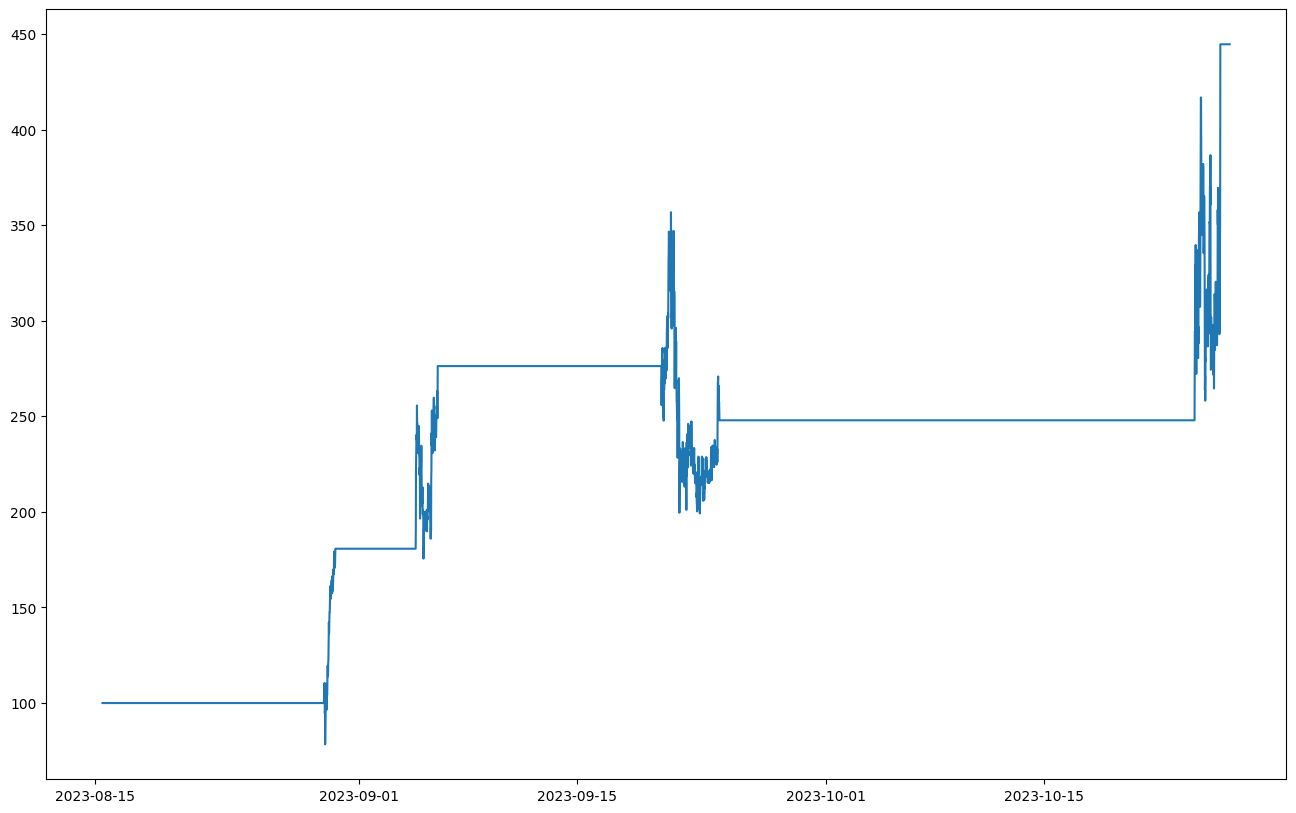

In [12]:
import matplotlib.pyplot as plt

#stats['_equity_curve']
plt.figure(figsize=(16, 10))
plt.plot(stats['_equity_curve']['Equity'])
plt.show()

In [13]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(x=stats['_equity_curve'].index, y=stats['_equity_curve']['Equity'])])
fig.show()

In [14]:
#heatmap plotly

import plotly.express as px
import plotly.graph_objects as go

#trades
fig = go.Figure(data=go.Heatmap(
                     z=stats['_trades']['PnL'],
                     x=stats['_trades']['EntryTime'],
                     y=stats['_trades']['EntryPrice'],
                     hoverongaps = False))
fig.show()